In [1]:
import keras
import numpy as np

Using TensorFlow backend.
/opt/anaconda3/envs/nmep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/nmep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/nmep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/nmep/lib/python3.7/site-packag

# Keras

##### By: (The one and only) James Bartlett, Edited by Ashley Chien

Keras is a neural network framework that wraps tensorflow (if you haven't heard of tensorflow it's another neural network framework) and makes it really simple to implement common neural networks. Its philosophy is to make simple things easy (but beware, trying to implement uncommon, custom neural networks can be pretty challenging in Keras, for the purposes of this course you will never have to that though so don't worry about it). If you are ever confused during this homework, Keras has really good documentation, so you can go to [Keras Docs](https://keras.io).

# Datasets
Keras has many datasets conveniently built in to the library. We can access them from the ``keras.datasets`` module. For this homework, we will be using their housing price dataset, their image classification dataset and their movie review sentiment dataset. To get a full list of their datasets, you can go to this link. [Keras Datasets](https://keras.io/datasets). To use their datasets, we import them and then call ``load_data()``, load_data returns two tuples, the first one is training data, and the second one is testing data. See the example below

In [2]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

You can also choose the proportion of training data you would like.

In [3]:
print("Size of training set before: ", x_train.shape)
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.10)
print("Size of training set after: ", x_train.shape)

Size of training set before:  (404, 13)
Size of training set after:  (455, 13)


In [4]:
from keras.utils import normalize
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

# Models
Every thing in Keras starts out with a model. From an initial model, we can add layers, train the model on data, evaluate the model on test sets, etc. We initialize a model with ``Sequential()``. `Sequential` refers to the fact that the model has a sequence of layers. Personally, I have very rarely used anything other than `Sequential`, so I think it's all you really need to worry about.

In [5]:
from keras.models import Sequential
model = Sequential()

Once we have a model, we can add layers to it with ``model.add``. Keras has a really good range of layers we can use. For example, if we want a basic fully connected layer we can use ``Dense``. I will now run through an example of using Keras to build and train a fully connected neural network for the purposes of regressing on housing prices for the dataset we loaded earlier.

In [6]:
from keras.layers import Dense
model.add(Dense(16, input_shape=(13,)))

This line of code adds a fully connected layer with 16 neurons. For the first layer of any model we always have to specify the input shape. In our case we will be training a fully connected network on the Boston Housing data, so each data point has 13 features. That's why we use an input_shape of (13,). The nice part about Keras is other than the input_shape for the first layer, we don't have to worry about shapes the rest of the time, Keras takes care of it. This can be really useful when you are doing complicated convolutions and things like that where working out the input shape to the next layer can be non-trivial.

Now let's add an Activation function to our network after our first fully connected layer.

In [7]:
from keras.layers import Activation
model.add(Activation('relu'))

Simple as that. We just added a relu activation to the whole layer. To see a list of activation functions available in Keras go to [Keras Activations](https://keras.io/activations/). Now let's add the final layer in our model.

In [8]:
model.add(Dense(1))

Now we can use a handy utility in Keras to print out what our model looks like so far.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


You can see it shows us what layers we have, the output shapes of each layer, and how many parameters there are for each layer. All this information can be really useful when trying to debug a model, or even for sharing your model architecture with others.

# Training
Now for actually training the model. Before we train a model we have to compile it. ``model.compile`` is how you specify which optimizer to use and what loss function to use. Sometimes choosing the right optimizer can have a significant effect on model performance. For a list of optimizers look at [Keras Optimizers](https://keras.io/optimizers). Choosing the right optimizer is mostly just trying each one to see which works better; there is some general advice for when to use each one but it is basically just another hyperparameter. We also have to choose a loss function. Choosing the right loss function is really important because the loss function decides what the goal of the model is. Since we are doing regression, we want to choose mean squared error, to get our output to be as close as possible to the label.  

In [10]:
model.compile(optimizer='SGD', loss='mean_squared_error')

Now we have to actually train our model on the data. This is really easy in Keras, in fact it only takes one line of code.

In [11]:
model.fit(x_train, y_train, epochs=100)


Epoch 1/100
455/455 [==============================] - 0s 451us/step - loss: 182.9595
Epoch 2/100
455/455 [==============================] - 0s 50us/step - loss: 74.0479
Epoch 3/100
455/455 [==============================] - 0s 53us/step - loss: 67.6902
Epoch 4/100
455/455 [==============================] - 0s 66us/step - loss: 72.0956
Epoch 5/100
455/455 [==============================] - 0s 51us/step - loss: 66.9180
Epoch 6/100
455/455 [==============================] - 0s 46us/step - loss: 67.2551
Epoch 7/100
455/455 [==============================] - 0s 87us/step - loss: 63.0274
Epoch 8/100
455/455 [==============================] - 0s 121us/step - loss: 64.7574
Epoch 9/100
455/455 [==============================] - 0s 104us/step - loss: 66.5159
Epoch 10/100
455/455 [==============================] - 0s 58us/step - loss: 66.2462
Epoch 11/100
455/455 [==============================] - 0s 98us/step - loss: 62.2943
Epoch 12/100
455/455 [==============================] - 0s 144us/step

455/455 [==============================] - 0s 42us/step - loss: 56.5631
Epoch 95/100
455/455 [==============================] - 0s 381us/step - loss: 54.9228
Epoch 96/100
455/455 [==============================] - 0s 53us/step - loss: 57.1556
Epoch 97/100
455/455 [==============================] - 0s 41us/step - loss: 58.2812
Epoch 98/100
455/455 [==============================] - 0s 42us/step - loss: 54.7377
Epoch 99/100
455/455 [==============================] - 0s 383us/step - loss: 56.8124
Epoch 100/100
455/455 [==============================] - 0s 97us/step - loss: 61.9228


# Evaluation
Now that we have trained our model we can evaluate it on our testing set. It is also just one line of code.

In [12]:
print("Loss: ", model.evaluate(x_test, y_test, verbose=0))

Loss:  74.81699879964192


This loss might seem very high and it is, mostly because there aren't very many training points in the dataset (also no effort was put into finding the best model).

We can also generate predictions for new data that we don't have labels for. Since we don't have new data, I will just demonstrate the idea with our testing data.

In [13]:
y_predicted = model.predict(x_test)
print(y_predicted)

[[25.05013 ]
 [20.20157 ]
 [23.80274 ]
 [26.806147]
 [26.63223 ]
 [20.371765]
 [27.153915]
 [30.241705]
 [26.131834]
 [20.786337]
 [20.482264]
 [16.534788]
 [23.767342]
 [25.795898]
 [30.455538]
 [18.951426]
 [29.462748]
 [18.490648]
 [20.020727]
 [20.747095]
 [27.148705]
 [20.82327 ]
 [19.13564 ]
 [27.309671]
 [25.261988]
 [25.820044]
 [25.955698]
 [30.080809]
 [19.563265]
 [24.690153]
 [26.722256]
 [25.20492 ]
 [20.30756 ]
 [24.794573]
 [24.675669]
 [20.566858]
 [24.476704]
 [25.370024]
 [21.186638]
 [25.418484]
 [27.35898 ]
 [26.953484]
 [27.281431]
 [30.277826]
 [22.524582]
 [26.346441]
 [20.594675]
 [24.788336]
 [23.50717 ]
 [24.706747]
 [19.85732 ]]


That's it. We have successfully (depending on your definition of success) built a fully connected neural network and trained that network on a dataset. Now it's your turn!

# Problem 1: Image Classification
We are going to build a convolutional neural network to predict image classes on CIFAR-10, a dataset of images of 10 different things (i.e. 10 classes). Things like airplanes, cars, deer, horses, etc. 

**(a)** Load the cifar10 dataset from Keras. If you need a hint go to [Keras Datasets](https://keras.io/datasets). This might take a little while to download.

In [14]:
from keras.datasets import cifar10
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar10.load_data()

**(b)** Initialize a Sequential model

In [15]:
cifar_model = Sequential()

**(c)** Add a ``Conv2D`` layer to the model. It should have 32 filters, a 5x5 kernel, and a 1x1 stride. The documentation [here](https://keras.io/layers/convolutional/#conv2d) will be your friend for this problem. __Hint:__ This is the first layer of the model so you have to specify the input shape. I recommend printing ``cifar_x_train.shape``, to get an idea of what the shape of the data looks like. Then add a ```relu``` activation layer to the model.

In [16]:
from keras.layers.convolutional import Conv2D
print(cifar_x_train.shape)
cifar_model.add(Conv2D(32, 5, activation='relu',input_shape=(32, 32, 3)))

(50000, 32, 32, 3)


**(d)** Add a ``MaxPooling2D`` layer to the model. The layer should have a 2x2 pool size. The documentation for Max Pooling is [here](https://keras.io/layers/pooling/).

In [17]:
from keras.layers.pooling import MaxPooling2D
cifar_model.add(MaxPooling2D())

**(e)** Add another ``Conv2D`` identical to last one, then another ``relu`` activation, then another ``MaxPooling2D`` layer. __Hint:__ You've already written this code

In [18]:
cifar_model.add(Conv2D(32, 5, activation='relu'))
cifar_model.add(MaxPooling2D())

**(f)** Add another ``Conv2D`` layer identical to the others except with 64 filters instead of 32. Add another ``relu`` activation layer.

In [19]:
cifar_model.add(Conv2D(64, 5, activation='relu'))

**(g)** Now we want to move from 2D data to 1D vectors for classification, to this we have to flatten the data. Keras has a layer for this called [Flatten](https://keras.io/layers/core/#flatten). Then add a ``Dense`` (fully connected) layer with 64 neurons, a ``relu`` activation layer, another ``Dense`` layer with 10 neurons, and a ``softmax`` activation layer.

In [20]:
from keras.layers import Flatten
cifar_model.add(Flatten())
cifar_model.add(Dense(64, activation='relu'))
cifar_model.add(Dense(10, activation='softmax'))

Notice that we have constructed a network that takes in an image and outputs a vector of 10 numbers and then we take the softmax of these, which leaves us with a vector of 0s except 1 one and the location of this one in the vector corresponds to which class the network is predicting for that image. This is sort of the canonical way of doing image classification.

**(h)** Now print a summary of your network.

In [21]:
cifar_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          51264     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

**(i)** We need to convert our labels from integers to length 10 vectors with 9 zeros and 1 one, where the integer label is the index of the 1 in the vector. Luckily, Keras has a handy function to do this for us. Have a look [here](https://keras.io/utils/#to_categorical).

In [22]:
from keras.utils import to_categorical
y_train_cat = to_categorical(cifar_y_train, num_classes=10)
y_test_cat = to_categorical(cifar_y_test, num_classes=10)

**(j)** Now compile the model with SGD optimizer and categorical_crossentropy loss function and also include ``metrics=['accuracy']`` as a parameter so we can see the accuracy of the model. Then train the model on the training data. For training we want to weight the classes in the loss function, so set the ``class_weight`` parameter of fit to be the ``class_weights`` dictionary. Be warned training can take forever, I trained on a cpu for 20 epochs (about 30 minutes) and only got 20% accuracy. For the purposes of this assignment, you don't need to worry to much about accuracy, just train for at least 1 epoch.

In [23]:
cifar_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
class_weights = {}
for i in range(10):
    class_weights[i] = 1. / np.where(cifar_y_train==i)[0].size

cifar_model.fit(cifar_x_train, y_train_cat, class_weight=class_weights, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 75s 2ms/step - loss: 0.0013 - accuracy: 0.1219
Epoch 2/5
50000/50000 [==============================] - 70s 1ms/step - loss: 6.7436e-04 - accuracy: 0.1393
Epoch 3/5
50000/50000 [==============================] - 68s 1ms/step - loss: 5.8962e-04 - accuracy: 0.1498
Epoch 4/5
50000/50000 [==============================] - 71s 1ms/step - loss: 5.4741e-04 - accuracy: 0.1584
Epoch 5/5
50000/50000 [==============================] - 65s 1ms/step - loss: 5.2172e-04 - accuracy: 0.1652


Now we can evaluate on our test set.

In [25]:
cifar_model.evaluate(cifar_x_test, y_test_cat)

10000/10000 [==============================] - 3s 288us/step


[2.5484515804290773, 0.17219999432563782]

We can also get the class labels the network predicts on our test set and look at a few examples.

Predicted label:  0
True label:  [1]


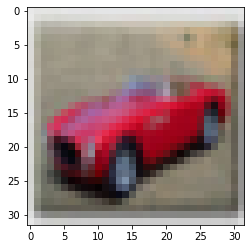

In [26]:
y_pred = cifar_model.predict(cifar_x_test)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cifar_x_test[1234])
print("Predicted label: ", np.argmax(y_pred[1234]))
print("True label: ", cifar_y_test[1234])

# Problem 2: Sentiment Classification

In this problem we will use Kera's imdb sentiment dataset. You will take in sequences of words and use an RNN to try to classify the sequences sentiment. First we have to process the data a little bit, so that we have fixed length sequences.

In [27]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000, maxlen=200)

/opt/anaconda3/envs/nmep/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/nmep/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [28]:
def process_data(data):
    processed = np.zeros(len(data) * 200).reshape((len(data), 200))
    for i, seq in enumerate(data):
        if len(seq) < 200:
            processed[i] = np.array(seq + [0 for _ in range(200 - len(seq))])
        else:
            processed[i] = np.array(seq)
    return processed

In [29]:
x_train_proc = process_data(x_train)
x_test_proc = process_data(x_test)
print(x_test_proc.shape)

(3913, 200)


The Embedding Layer is a little bit different from most of the layers, so we have provided that code for you below. Basically, the 1000 means that we are using a vocabulary size of 1000, the 32 means we will have a vector of size 32 as the output, and the `mask_zero` means that we don't care about 0 because we are using it for padding.

In [30]:
imdb_model = Sequential()

In [31]:
from keras.layers.embeddings import Embedding
imdb_model.add(Embedding(1000, 32, input_length=200, mask_zero=True))

**(a)** For this problem, I won't walk you everything like I did in the last one. What you need to do is as follows. Add an LSTM layer with 32 outputs, then a Dense layer with 32 neurons, then a relu activation, then a dense layer with 1 neuron, then a sigmoid activation. Then you should print out the model summary.

In [32]:
from keras.layers import LSTM
imdb_model.add(LSTM(32))
imdb_model.add(Dense(32, activation='relu'))
imdb_model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**(b)** Now compile the model with binary cross entropy, and the Adam optimizer. Also include accuracy as a metric in the compile. Then train the model on the processed data (no need to worry about class weights this time)

In [33]:
imdb_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
imdb_model.fit(x_train_proc, y_train, epochs=5)

Epoch 1/5
25000/25000 [==============================] - 106s 4ms/step - loss: 0.4075 - accuracy: 0.8114
Epoch 2/5
25000/25000 [==============================] - 121s 5ms/step - loss: 0.3144 - accuracy: 0.8661
Epoch 3/5
25000/25000 [==============================] - 123s 5ms/step - loss: 0.2909 - accuracy: 0.8772
Epoch 4/5
25000/25000 [==============================] - 124s 5ms/step - loss: 0.2735 - accuracy: 0.8867
Epoch 5/5
25000/25000 [==============================] - 103s 4ms/step - loss: 0.2624 - accuracy: 0.8908


After training we can evaluate our model on the test set.

In [34]:
print("Accuracy: ", imdb_model.evaluate(x_test_proc, y_test)[1])

3913/3913 [==============================] - 3s 875us/step
Accuracy:  0.8676207661628723


Now we can look at our predictions and the sentences they correspond to.

In [35]:
y_pred = imdb_model.predict(x_test_proc)

In [36]:
y_pred = np.vectorize(lambda x: int(x >= 0.5))(y_pred)
correct = []
incorrect = []
for i, pred in enumerate(y_pred):
    if y_test[i] == pred:
        correct.append(i)
    else:
        incorrect.append(i)
word_dict = inv_map = {v: k for k, v in imdb.get_word_index().items()}

print(list(map(lambda x: word_dict[int(x)] if x != 0 else None, x_test[correct[123]])))

1646592/1641221 [==============================] - 0s 0us/step
['the', 'is', 'and', 'much', 'way', 'you', 'film', 'and', 'love', 'development', "you'll", 'to', 'and', 'i', 'i', 'is', 'and', 'talking', 'and', 'acting', 'his', 'when', 'would', 'nature', 'to', 'gave', 'in', '20', 'about', 'and', 'in', 'team', 'and', 'about', 'and', 'in', 'footage', 'american', 'film', 'about', 'editing', 'this', 'and', 'would', 'find', 'good', 'and', 'and', 'or', 'and', 'god', 'to', 'and']


After making this I realized that `keras`'s method for converting from word index back to words is broken right now (see this open [github issue](https://github.com/fchollet/keras/issues/5912)). So we can't actually see what the sentences look like.